In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Input
from tensorflow.keras.models import Model



print(tf.__version__)

gpus = tf.config.list_physical_devices(device_type='GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
except:
    print('Error!')
    pass

2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


加载数据

In [16]:
Samples = np.load(file="samples.npy")
Labels = np.load(file='labels.npy')

训练集，测试集划分

In [544]:
split = 70100*2
x_train = Samples[:split,:,:]
y_train = Labels[:split]
x_test = Samples[split+701*1:split+701*2,:,:]
y_test = Labels[split+701*1:split+701*2]

In [545]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140200, 100, 2), (140200,), (701, 100, 2), (701,))

1D-CNN模型：

In [491]:
def built_model():
    INPUT = Input(shape=(100,2))
#     x = layers.Bidirectional(layers.LSTM(32,dropout=0.2))(INPUT)#双向LSTM
    x  = layers.Conv1D(8,3,activation = 'relu')(INPUT)
    x = layers.MaxPooling1D()(x)
    x  = layers.Conv1D(16,3,activation = 'relu')(x)
    x = layers.MaxPooling1D()(x)
    x  = layers.Conv1D(32,3,activation = 'relu')(x)
#     x = layers.MaxPooling1D()(x)
    x = layers.Flatten()(x)

    y = layers.Dense(64,activation = 'relu')(x)
    y = layers.Dense(1)(y)
    model = Model(INPUT, y)
    return model

model = built_model()
model.summary()

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 100, 2)]          0         
_________________________________________________________________
conv1d_165 (Conv1D)          (None, 98, 8)             56        
_________________________________________________________________
max_pooling1d_99 (MaxPooling (None, 49, 8)             0         
_________________________________________________________________
conv1d_166 (Conv1D)          (None, 47, 16)            400       
_________________________________________________________________
max_pooling1d_100 (MaxPoolin (None, 23, 16)            0         
_________________________________________________________________
conv1d_167 (Conv1D)          (None, 21, 32)            1568      
_________________________________________________________________
flatten_55 (Flatten)         (None, 672)               0  

In [492]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [550]:
history = model.fit(x_train, y_train, batch_size=128,epochs=100, verbose=1)

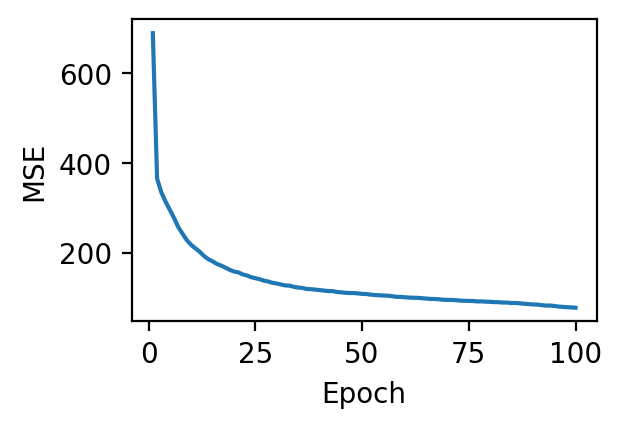

In [500]:
plt.figure(figsize=(3,2),dpi=200)
epoch_range = range(1, 100+1)
plt.plot(epoch_range,history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

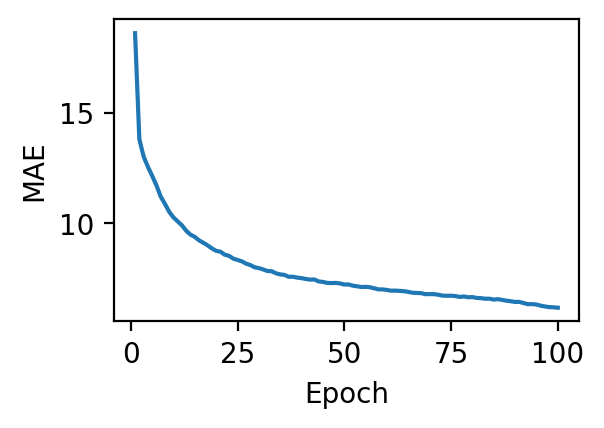

In [501]:
plt.figure(figsize=(3,2),dpi=200)
epoch_range = range(1, 100+1)
plt.plot(epoch_range,history.history['mae'])
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

模型保存

In [ ]:
model.save('model.h5')

加载模型

In [549]:
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

曲线(loss,mae)

测试：

In [546]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print('loss:',test_mse_score)
print('mae:',test_mae_score)

22/22 [==============================] - 0s 2ms/step - loss: 30.6823 - mae: 4.4071
loss: 30.68231964111328
mae: 4.407118797302246


预测，曲线拟合

In [547]:
y_test_predict = model.predict(x_test)

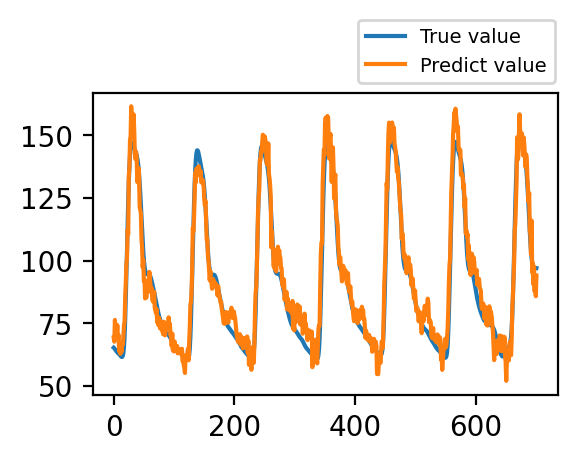

In [548]:
plt.figure(figsize=(3,2),dpi=200)
plt.plot(y_test,label = 'True value')
plt.plot(y_test_predict,label = 'Predict value')
plt.legend(bbox_to_anchor=(0.55,1),fontsize=7)
# plt.savefig('D:/桌面/兼职/7.29/预测08(6_8)',bbox_inches='tight')
plt.show()